<a href="https://colab.research.google.com/github/tanukhatiyan/Fire-detection-using-deep-learning-/blob/main/forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,Input

In [3]:
physical_devices =tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is available!')
else:
    print('GPU is NOT available!')


GPU is available!


In [13]:
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train' # Corrected 'tain' to 'train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [14]:
classes = os.listdir(train_dir)
num_classes=len(classes)
print(f'Number of classes: {num_classes}')
print(f'Classes : {classes}')

Number of classes: 2
Classes : ['nofire', 'fire']


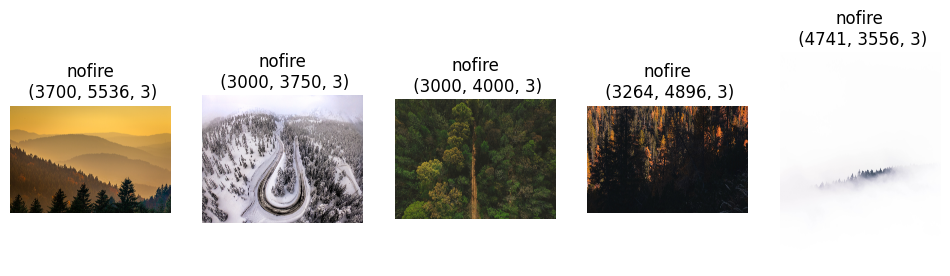

In [17]:
plt.figure(figsize=(12,10))
for i in range(5):
    class_path=os.path.join(train_dir,classes[0])
    img_name=os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img=plt.imread(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{classes[0]}\n {img.shape}')
plt.show()

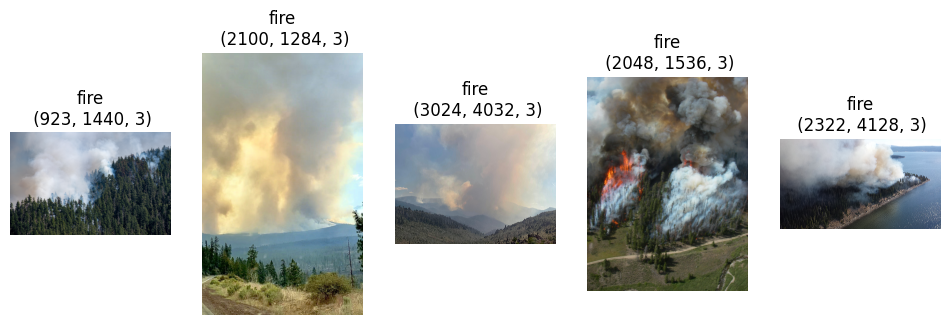

In [19]:
plt.figure(figsize=(12,10))
for i in range(5):
    class_path=os.path.join(train_dir,classes[1])
    img_name=os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img=plt.imread(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{classes[1]}\n {img.shape}')
plt.show()

In [21]:
#preprocessing
img_width, img_height = 150, 150
batch_size= 32
# data generators
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size =( img_width , img_height),
    batch_size =batch_size,
    class_mode='binary',
    shuffle= True)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size =( img_width , img_height),
    batch_size =batch_size,
    class_mode='binary',
    shuffle= True)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size =( img_width , img_height),
    batch_size =batch_size,
    class_mode='binary',
    shuffle= True)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [23]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print("class Name: ",class_names)

class Name:  ['fire', 'nofire']


In [25]:
model = Sequential([
      Input(shape=(img_width, img_height, 3)),
      Conv2D(32, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')  # Binary classification
  ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)